In [1]:
import xarray as xr  

import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from bs_fdbck.constants import path_extract_latlon_outdata
from dask.diagnostics import ProgressBar
import seaborn as sns

 from pathlib import Path 
 Path(path).mkdir(exist_ok=True, parents=True)


In [2]:
from bs_fdbck.util.BSOA_datamanip import compute_total_tau, broadcase_station_data, change_units_and_compute_vars, \
    get_dic_df_mod

In [3]:
def make_fn(case, v_x, v_y, comment=''):
    _x = v_x.split('(')[0]
    _y = v_y.split('(')[0]
    f = f'dist_plots_{comment}_{case}_{_x}_{_y}.png'
    return plot_path /f



In [4]:
plot_path = Path('Plots')

In [5]:
xr.set_options(keep_attrs=True) 

## Get observational data

In [6]:
import pandas as pd

In [7]:
from bs_fdbck.constants import measurements_path

## Get model data:

### Settings

In [8]:
lat_smr = 61.85
lon_smr = 24.28
model_lev_i=-1

In [9]:
temperature = 273.15  # K


from_time1 = '2012-01-01'
to_time1 = '2015-01-01'
from_time2 ='2015-01-01'
to_time2 ='2019-01-01'


sel_years_from_files = ['2012','2014','2015','2018']

In [10]:
case_name = 'OsloAero_intBVOC_f09_f09_mg17_fssp245'

case_name1 = 'OsloAero_intBVOC_f09_f09_mg17_full'
case_name2 = 'OsloAero_intBVOC_f09_f09_mg17_ssp245'

In [11]:
fn1 = path_extract_latlon_outdata/ case_name1/f'{case_name1}.h1._{from_time1}-{to_time1}_concat_subs_22.0-30.0_60.0-66.0.nc'
fn1_2 = fn1.parent / f'{fn1.stem}_sort.nc'
fn1_3 = fn1.parent / f'{fn1.stem}_lev-1.nc'

fn2 = path_extract_latlon_outdata/ case_name2/f'{case_name2}.h1._{from_time2}-{to_time2}_concat_subs_22.0-30.0_60.0-66.0.nc'

fn2_2 = fn2.parent / f'{fn2.stem}_sort.nc'
fn2_3 = fn2.parent / f'{fn2.stem}_lev-1.nc'

fn_comb =path_extract_latlon_outdata / case_name /f'{case_name}.h1._{from_time1}-{to_time2}_concat_subs_22.0-30.0_60.0-66.0.nc'
fn_comb_lev1 = path_extract_latlon_outdata/ case_name/f'{case_name}.h1._{from_time1}-{to_time2}_concat_subs_22.0-30.0_60.0-66.0_lev1.nc'
fn_comb_lev1_final = path_extract_latlon_outdata/ case_name/f'{case_name}.h1._{from_time1}-{to_time2}_concat_subs_22.0-30.0_60.0-66.0_lev1_final.nc'
fn_comb_lev1_final_csv = path_extract_latlon_outdata/ case_name/f'{case_name}.h1._{from_time1}-{to_time2}_concat_subs_22.0-30.0_60.0-66.0_lev1_final.csv'

In [12]:

cases = [case_name]

In [13]:
varl =['DOD500','DOD440','ACTREL','ACTNL','TGCLDLWP', #,'SOA_A1',
       'H2SO4','SOA_LV','COAGNUCL','FORMRATE','T'
       ,'FCTL',
       'TOT_CLD_VISTAU','TOT_ICLD_VISTAU','TGCLDCWP',
       'CLDFREE',
      'SOA_NA','SOA_A1','OM_NI','OM_AI','OM_AC','SO4_NA','SO4_A1','SO4_A2','SO4_AC','SO4_PR',
      'BC_N','BC_AX','BC_NI','BC_A','BC_AI','BC_AC','SS_A1','SS_A2','SS_A3','DST_A2','DST_A3', 
       'FSDSC','FSDSCDRF'
      ]

## Station variables

In [14]:
varl_st = [      'SOA_NA','SOA_A1','OM_NI','OM_AI','OM_AC','SO4_NA','SO4_A1','SO4_A2','SO4_AC','SO4_PR',
      'BC_N','BC_AX','BC_NI','BC_A','BC_AI','BC_AC','SS_A1','SS_A2','SS_A3','DST_A2','DST_A3',
                 ]


varl_cl = ['TOT_CLD_VISTAU','TOT_ICLD_VISTAU','TGCLDCWP','TGCLDLWP','TGCLDIWP',
           'TOT_CLD_VISTAU_s','TOT_ICLD_VISTAU_s','optical_depth',
           'CLDFREE',
           'FCTL',
           'ACTREL','ACTNL','TGCLDLWP',
           'FSDSC','FSDSCDRF',
           'FCTI',
           'FCTL',
           'FLNS',
           'FLNSC',
           'FLNT',
           'FLNTCDRF',
           'FLNT_DRF',
           'FLUS',
           'FLUTC','FORMRATE',
           'FREQI',
           'FREQL',
           'FSDSCDRF',
           'FSDS_DRF',
           'FSNS',
           'FSNSC',
           'FSNT',
           'FSNTCDRF',
           'FSNT_DRF',
           'FSUS_DRF',
           'FSUTADRF',
           ]

## If file not already createad already, skip this part

In [15]:
fn_comb.exists()

True

In [16]:
if not fn_comb.exists():
    if (not fn1_2.exists()) or (not fn2_2.exists()):
        ds_mod1 = xr.open_dataset(fn1, chunks = {'time':96})#[fn1,fn2])#.sortby('time')
        ds_mod2 = xr.open_dataset(fn2, chunks = {'time':96})

        varl1 = set(ds_mod1.data_vars)

        varl2 = set(ds_mod2.data_vars)


        varl =list(varl1.intersection(varl2))

        ds_mod1 = ds_mod1[varl].sel(time=slice(sel_years_from_files[0],sel_years_from_files[1]))#.sortby('time')

        ds_mod2 = ds_mod2[varl].sel(time=slice(sel_years_from_files[2],sel_years_from_files[3]))#.sortby('time')
        print('HEEEEY')
        if not fn1_2.exists():
            delayed_obj = ds_mod1.to_netcdf(fn1_2, compute=False)
            with ProgressBar():
                results = delayed_obj.compute()
        if not fn2_2.exists():
            delayed_obj = ds_mod2.to_netcdf(fn2_2, compute=False)
            with ProgressBar():
                results = delayed_obj.compute()
    
    if not fn1_3.exists():
            ds_mod1 = xr.open_dataset(fn1_2, chunks = {'time':48})#[fn1,fn2])#.sortby('time')
            ds_mod1 = compute_total_tau(ds_mod1)
            ds_mod1 = ds_mod1.isel(lev = model_lev_i)
            ds_mod1 = ds_mod1.sortby('time')#.sel(time=slice('2012','2014'))
            delayed_obj = ds_mod1.to_netcdf(fn1_3, compute=False)
            print('hey 1')
            with ProgressBar():
                results = delayed_obj.compute()
    if not fn2_3.exists():
            ds_mod2 = xr.open_dataset(fn2_2, chunks = {'time':48})#[fn1,fn2])#.sortby('time')
            ds_mod2 = compute_total_tau(ds_mod2)
            ds_mod2 = ds_mod2.isel(lev = model_lev_i)
            ds_mod2 = ds_mod2.sortby('time')#.sel(time=slice('2012','2014'))
            delayed_obj = ds_mod2.to_netcdf(fn2_3, compute=False)
            print('hey')
            with ProgressBar():
                results = delayed_obj.compute()
    
    
    ds_mod = xr.open_mfdataset([fn1_3,fn2_3], combine='by_coords', concat_dim='time')

    fn_comb.parent.mkdir(exist_ok=True,)

    delayed_obj = ds_mod.to_netcdf(fn_comb, compute = False)
    with ProgressBar():
        results = delayed_obj.compute()

    #ds_mod = xr.concat([ds_mod1[varl].sel(time=slice('2012','2014')), ds_mod2[varl].sel(time=slice('2015','2018'))], dim='time')

### Select hyytiala grid cell:
    

    #if not fn_comb_lev1.exists():
    ds_mod = xr.open_dataset(fn_comb, chunks = {'time':48})#[fn1,fn2])#.sortby('time')
    #ds_mod2 = xr.open_dataset(fn2, chunks = {'time':48})

    #ds_mod = compute_total_tau(ds_mod)

    #ds_mod = ds_mod.sortby('time')#.sel(time=slice('2012','2014'))

    #ds_mod = ds_mod.isel(lev = model_lev_i)


    delayed_obj = ds_mod.to_netcdf(fn_test)#, compute=False)
    #    print('hey')
    #with ProgressBar():
    #    results = delayed_obj.compute()

## If file createad already, skip to here

### Select hyytiala grid cell:

We use only hyytiala for org etc, but all grid cells over finland for cloud properties

In [17]:
if not fn_comb_lev1_final.exists():
    ds_all = xr.open_dataset(fn_comb).isel(ilev=model_lev_i)
    ds_sel = ds_all.sel(lat = lat_smr, lon= lon_smr, method='nearest')#.isel( ilev=model_lev_i)#.load()
    ds_all = ds_all.isel(
        #ilev=-1,
        # cosp_tau_modis=0,
        #                                                    cosp_tau=0,
        #                                                   cosp_dbze=0,
        #                                                    cosp_ht=0,
        #                                                    cosp_prs = 0,
        #                                                   cosp_reffice=0,
        #                                                    cosp_htmisr=0,
        #                                                    cosp_reffliq=0,
        #                                                    cosp_scol=0,
        #                                                    cosp_sr=0,
        #                                                    cosp_sza=0,
        nbnd=0
    ).squeeze()
    ds_all = broadcase_station_data(ds_all)
    ds_all = change_units_and_compute_vars(ds_all, temperature=temperature)


    delayed_obj = ds_all.to_netcdf(fn_comb_lev1_final, compute=False)
    print('hey')
    with ProgressBar():
        results = delayed_obj.compute()

### Broadcast ds_sel to same grid

In [18]:

ds_all = xr.open_dataset(fn_comb_lev1_final)

In [22]:
dic_ds = dict()
dic_ds[case_name] =ds_all

In [23]:
dic_ds.keys()

dict_keys(['OsloAero_intBVOC_f09_f09_mg17_fssp245'])

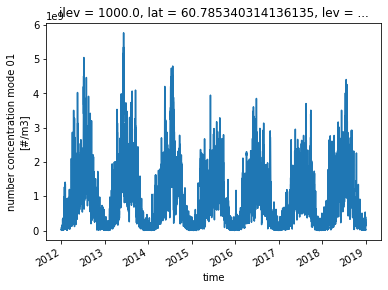

In [21]:
ds_all['NCONC01'].isel(lat=0,lon=0).plot()

In [24]:
    #if not fn_comb_lev1_final_csv.exists():
    dic_df = get_dic_df_mod(dic_ds, select_hours_clouds=True)

    df_mod = dic_df[case_name]
    df_mod.to_csv(fn_comb_lev1_final_csv)

<xarray.Dataset>
Dimensions:            (time: 61344, lat: 6, lon: 7)
Coordinates:
    ilev               float64 1e+03
  * lat                (lat) float64 60.79 61.73 62.67 63.61 64.55 65.5
    lev                float64 992.6
  * lon                (lon) float64 22.5 23.75 25.0 26.25 27.5 28.75 30.0
  * time               (time) datetime64[ns] 2012-01-02 ... 2018-12-31T23:00:00
Data variables: (12/191)
    NMR13              (time, lat, lon) float32 ...
    nscur              (time) int32 ...
    hybm               (time) float64 ...
    T                  (time, lat, lon) float32 ...
    EC550AER           (time, lat, lon) float32 ...
    FLNS               (time, lat, lon) float32 ...
    ...                 ...
    SOA                (time, lat, lon) float64 ...
    OA                 (time, lat, lon) float64 ...
    POA                (time, lat, lon) float64 ...
    SO4                (time, lat, lon) float64 ...
    optical_depth      (time, lat, lon) float32 ...
    transmitt

<AxesSubplot:xlabel='time,lat,lon'>

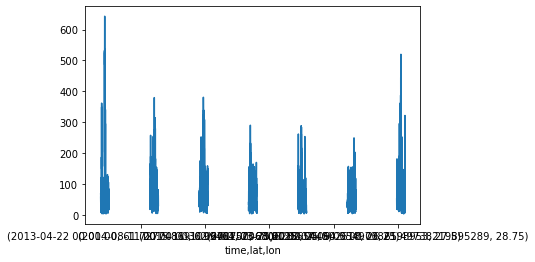

In [26]:
df_mod['CCN3'].plot()

In [32]:
df_mod = pd.read_csv(fn_comb_lev1_final_csv, index_col=[0,1,2] )